In [6]:

import pandas as pd

# Load the dataset
data = pd.read_csv("../data/web_traffic.csv")

# Display the first few rows
print("Dataset Preview:")
print(data.head())

# Check dataset information
print("\nDataset Info:")
print(data.info())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Summary statistics
print("\nSummary Statistics:")
print(data.describe())


Dataset Preview:
             Timestamp  TrafficCount
0  2020-01-20 00:00:00         487.0
1  2020-01-20 00:30:00         385.0
2  2020-01-20 01:30:00         269.0
3  2020-01-20 02:30:00         517.0
4  2020-01-20 03:30:00         129.0

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2793 entries, 0 to 2792
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Timestamp     2793 non-null   object 
 1   TrafficCount  2793 non-null   float64
dtypes: float64(1), object(1)
memory usage: 43.8+ KB
None

Missing Values:
Timestamp       0
TrafficCount    0
dtype: int64

Summary Statistics:
       TrafficCount
count   2793.000000
mean    8591.321160
std    11478.605594
min       22.000000
25%      713.000000
50%     2418.000000
75%    14356.000000
max    71925.000000


In [7]:
# Convert Timestamp to datetime
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Set Timestamp as the index
data.set_index('Timestamp', inplace=True)

print("\nData after setting Timestamp as index:")
print(data.head())



Data after setting Timestamp as index:
                     TrafficCount
Timestamp                        
2020-01-20 00:00:00         487.0
2020-01-20 00:30:00         385.0
2020-01-20 01:30:00         269.0
2020-01-20 02:30:00         517.0
2020-01-20 03:30:00         129.0


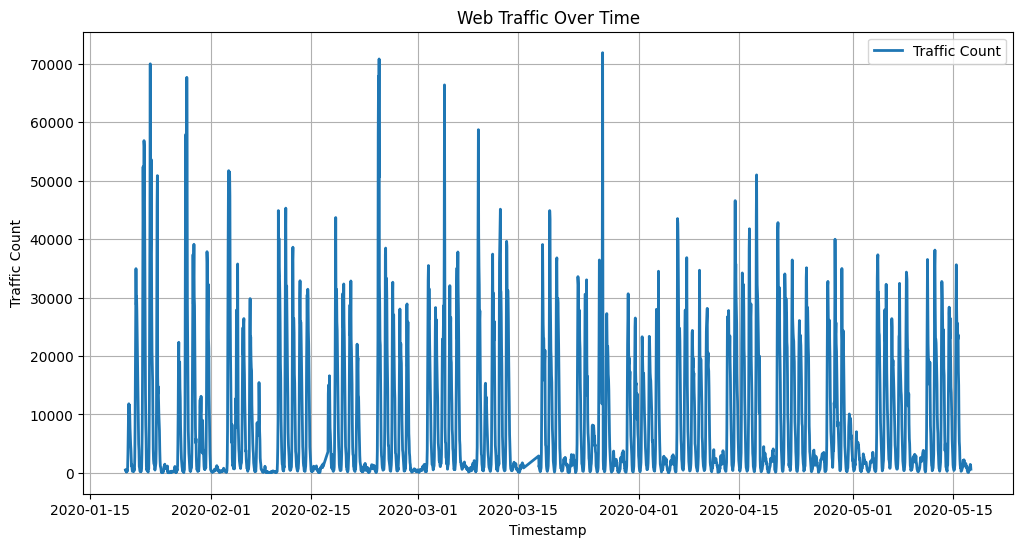

In [8]:
import matplotlib.pyplot as plt

# Plot traffic count
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['TrafficCount'], label='Traffic Count', linewidth=2)
plt.xlabel("Timestamp")
plt.ylabel("Traffic Count")
plt.title("Web Traffic Over Time")
plt.legend()
plt.grid(True)
plt.show()


### 1. Web Traffic Over Time
- Traffic counts vary significantly over time, with noticeable spikes during certain periods.
- This indicates periodic high-traffic events or anomalies that may correspond to specific times of the day or external factors.


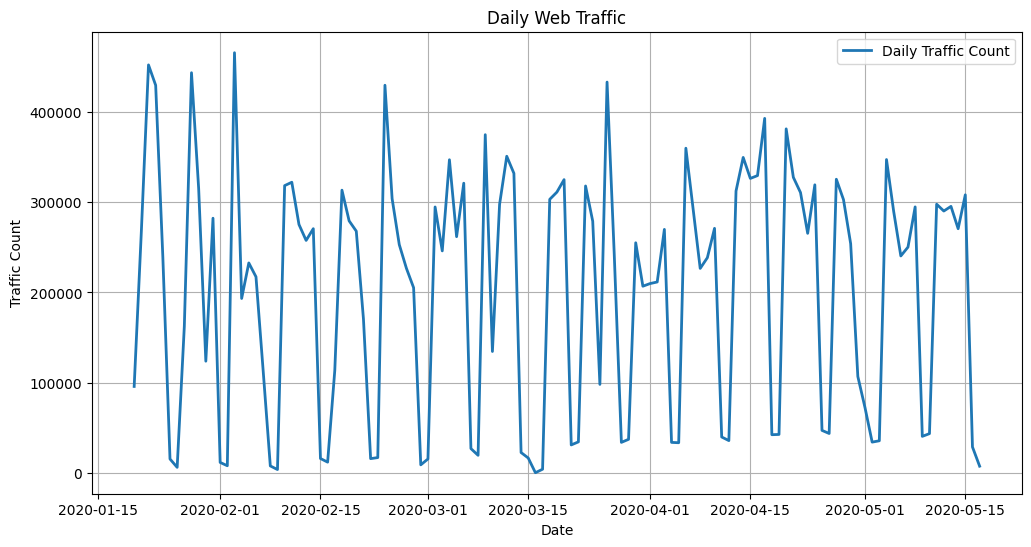

In [9]:
# Resample data to daily intervals
data_daily = data.resample('D').sum()

# Plot daily traffic
plt.figure(figsize=(12, 6))
plt.plot(data_daily.index, data_daily['TrafficCount'], label='Daily Traffic Count', linewidth=2)
plt.xlabel("Date")
plt.ylabel("Traffic Count")
plt.title("Daily Web Traffic")
plt.legend()
plt.grid(True)
plt.show()


### 2. Daily Web Traffic Trends
- Daily traffic patterns show sharp peaks and drops, reflecting variable user activity across days.
- Some days experience exceptionally high traffic, which could signify special events, promotions, or anomalies.


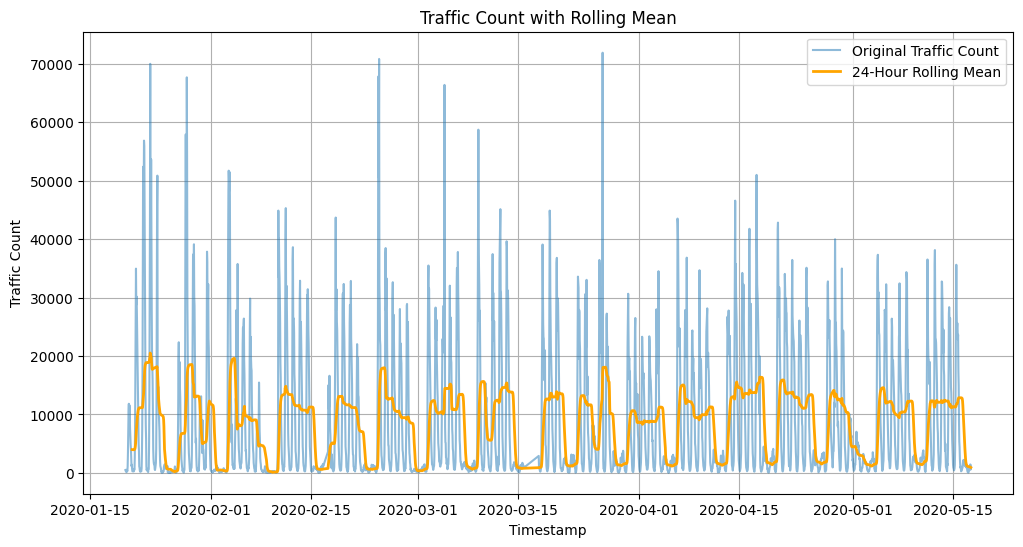

In [10]:
# Calculate rolling mean
data['RollingMean'] = data['TrafficCount'].rolling(window=24).mean()

# Plot rolling mean
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['TrafficCount'], label='Original Traffic Count', alpha=0.5)
plt.plot(data.index, data['RollingMean'], label='24-Hour Rolling Mean', color='orange', linewidth=2)
plt.xlabel("Timestamp")
plt.ylabel("Traffic Count")
plt.title("Traffic Count with Rolling Mean")
plt.legend()
plt.grid(True)
plt.show()


### 3. Rolling Mean Analysis
- The 24-hour rolling mean smooths out short-term fluctuations and highlights underlying trends.
- Regular traffic peaks likely correspond to daily or weekly cycles, showcasing periodic behavior in user activity.


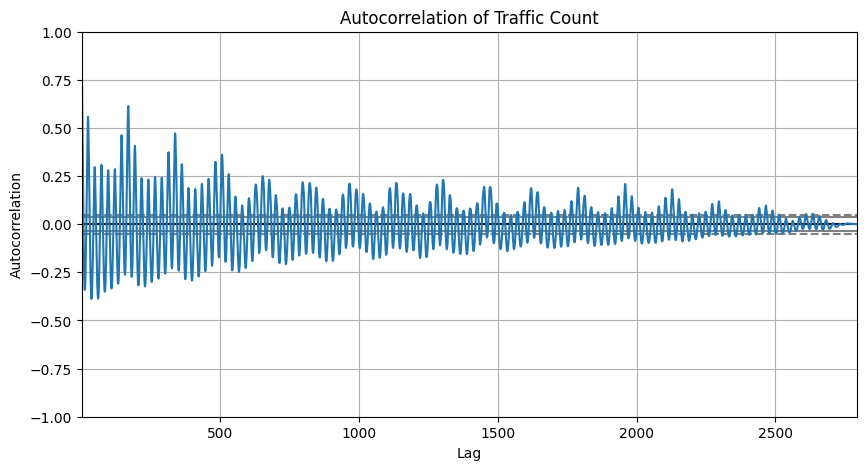

In [11]:
# Autocorrelation plot
from pandas.plotting import autocorrelation_plot

plt.figure(figsize=(10, 5))
autocorrelation_plot(data['TrafficCount'])
plt.title("Autocorrelation of Traffic Count")
plt.show()


### 4. Autocorrelation Analysis
- Strong periodicity is evident, as seen in the autocorrelation plot.
- This confirms consistent traffic patterns, potentially driven by user habits, time zones, or scheduled events.
